# Implements the Classic and Po Shen Loh ‘s methods for solving quadratic equations

In [20]:
import math as m
import matplotlib.pyplot as plt
import numpy as np
import cmath

In [9]:
def func(fx):
  x = np.linspace(-4,4,100)
  fig, ax = plt.subplots()
  ax.plot(x,fx)
  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  ax.grid(True, which='both')
  plt.title('f(x)')
  plt.xlabel('x')
  plt.ylabel('f(x)')

# x^2

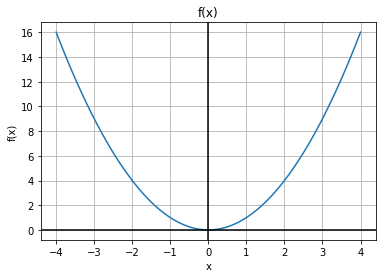

In [10]:
func(x**2)

# (x-1)^2

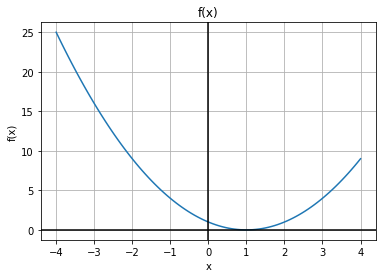

In [11]:
func((x-1)*(x-1))

# (x*x)-1

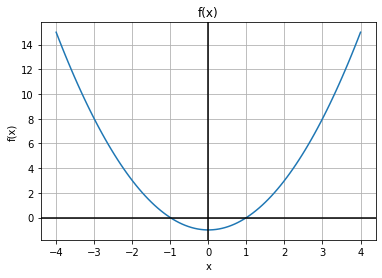

In [12]:
func((x*x)-1)

# (x*x)+1

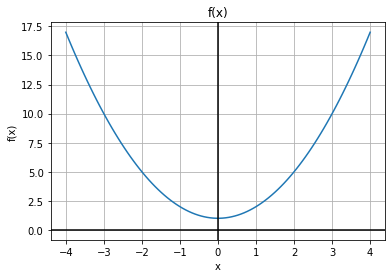

In [13]:
func((x*x)+1)

# Parte 2

In [21]:
def part2(b, c):
  x_1 = -int(m.sqrt(abs(c)))
  x_2 = 0
  while x_1 * x_1 <= c or x_1 <= 0: 
    x_2 = b - x_1
    if x_1 * x_2 == c:
      print("Las raices son reales y son: " ,-x_1, " y ", -x_2, sep = "")
      return
    else: 
      x_1 += 1
  print("Las raices son complejas")
  r = b/2
  i = -int(m.sqrt(abs(c)))
  while i * i <= c:
   if r*r + i*i == c:
    print("Las raices son: ", r," + ",i,"i y ", r , " + ",-i,"i", sep = "")
    break
   else: 
    i += 1

In [23]:
print("Para: x^2 = 0")
part2(0,0)
print("Para: (x-1)^2 = 0")#(x-1)^2 = 0
part2(-2,1)
print("Para: x^2 – 1 =0")#x^2 – 1 =0
part2(0,-1)
print("Para: x^2+ 1 =0")#x^2+ 1 =0
part2(0,1)
part2(0,9)

Para: x^2 = 0
Las raices son reales y son: 0 y 0
Para: (x-1)^2 = 0
Las raices son reales y son: 1 y 1
Para: x^2 – 1 =0
Las raices son reales y son: 1 y -1
Para: x^2+ 1 =0
Las raices son complejas
Las raices son: 0.0 + -1i y 0.0 + 1i
Las raices son complejas
Las raices son: 0.0 + -3i y 0.0 + 3i


# Po Shen Loh

In [34]:
def po_shen_loh(b, c):
  if ((b*b)/4) - c >= 0:
    z_1 = -b/2 + m.sqrt(((b*b)/4) - c)
    z_2 = -b/2 - m.sqrt(((b*b)/4) - c)
    print("Las raices son reales y son: ",z_1," y ",z_2,sep = "")
  else:
    z_1_R =  -b/2
    z_2_R =  -b/2
    z_1_I = m.sqrt(abs(((b*b)/4) - c))
    z_2_I =  m.sqrt(abs(((b*b)/4) - c))
    print("Las raíces son complejas y son: ", z_1_R, " + ", z_1_I, "i y ", z_2_R, " - ", z_2_I,"i", sep = "")

In [35]:
#x^2 = 0
print("x^2 = 0")
po_shen_loh(0,0)
#(x-1)^2 = 0
print("(x-1)^2 = 0")
po_shen_loh(-2,1)
#x^2 – 1 =0
print("x^2 – 1 =0")
po_shen_loh(0,-1)
#x^2+ 1 =0
print("x^2+ 1 =0")
po_shen_loh(0,1)

x^2 = 0
Las raices son reales y son: 0.0 y 0.0
(x-1)^2 = 0
Las raices son reales y son: 1.0 y 1.0
x^2 – 1 =0
Las raices son reales y son: 1.0 y -1.0
x^2+ 1 =0
Las raíces son complejas y son: 0.0 + 1.0i y 0.0 - 1.0i


## 3

z^2

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


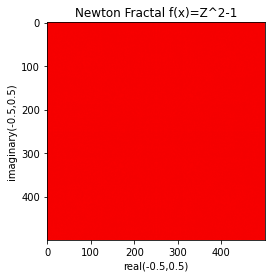

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


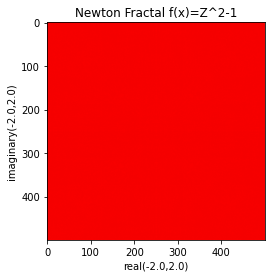

Z region from ( -4.0 , -4.0 ) to ( 4.0 , 4.0 )


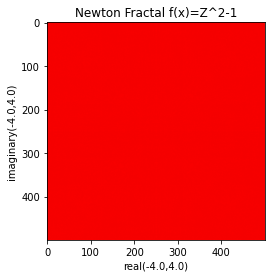

zoom in
Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


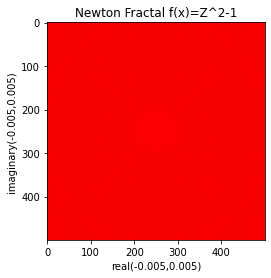

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


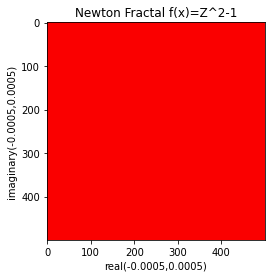

Z region from ( -5e-06 , -5e-06 ) to ( 5e-06 , 5e-06 )


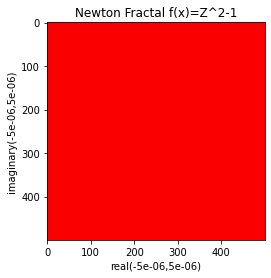

La monotonía de la representación indica que la raíz es única y existe


In [37]:
def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 0

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - 2*f(z) / dz # Newton iteration, taking into account the fact that this polynomial has a root with multiplicity 2.

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

print("zoom out")
display1(zoom=1)
display1(zoom=4)
display1(zoom=8) 

print("zoom in")
display1(zoom=1/100)
display1(zoom=1/1000)
display1(zoom=1/100000)

print("La monotonía de la representación indica que la raíz es única y existe")

(z-1)^2

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


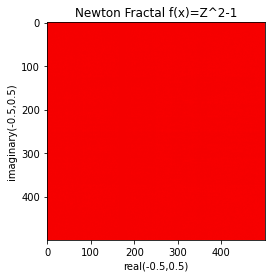

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


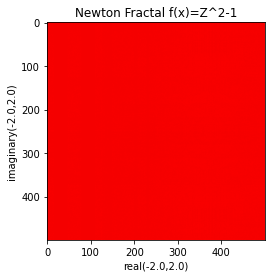

Z region from ( -4.0 , -4.0 ) to ( 4.0 , 4.0 )


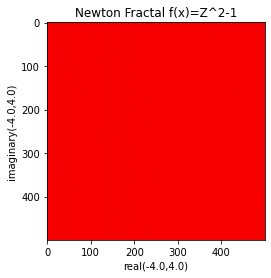

zoom in
Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


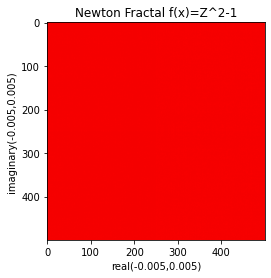

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


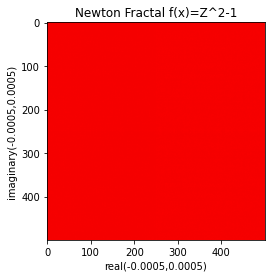

Z region from ( -5e-06 , -5e-06 ) to ( 5e-06 , 5e-06 )


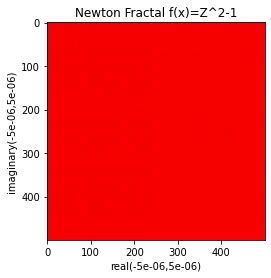

La monotonía de la representación indica que la raíz es única y existe


In [39]:
def plot_f(f):
  x = np.linspace(-4.0,4.0,100)
  fig, ax = plt.subplots()
  ax.plot(x,f(x))
  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  ax.grid(True, which='both')
  plt.title('f(x)')
  plt.xlabel('x')
  plt.ylabel('f(x)')

def f(z):
    return (z-1) ** 2

def df(z):
    return 2 * (z-1)

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - 2*f(z) / dz # Newton iteration, taking into account the fact that this polynomial has a root with multiplicity 2.

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

print("zoom out")
display1(zoom=1)
display1(zoom=4)
display1(zoom=8) 

print("zoom in")
display1(zoom=1/100)
display1(zoom=1/1000)
display1(zoom=1/100000)
print("La monotonía de la representación indica que la raíz es única y existe")

z^2 – 1

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


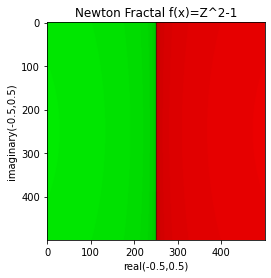

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


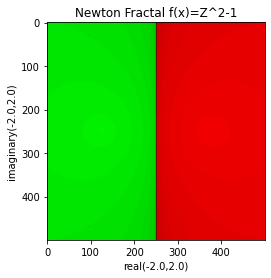

Z region from ( -4.0 , -4.0 ) to ( 4.0 , 4.0 )


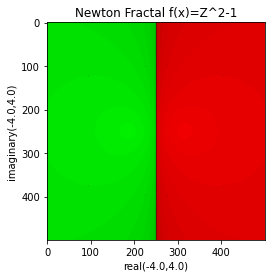

zoom in
Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


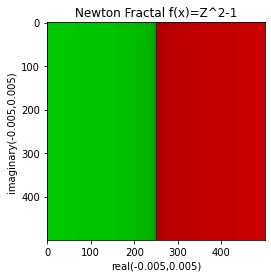

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


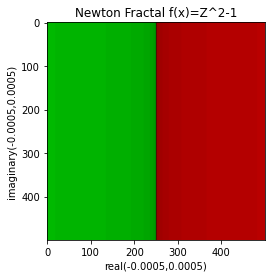

Z region from ( -5e-06 , -5e-06 ) to ( 5e-06 , 5e-06 )


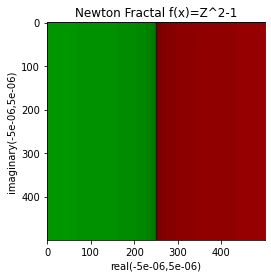

La representación muestra que el polinomio tiene dos raíces a las que se puede converger desde el punto inicial.


In [40]:
def f(z):
    return z ** 2 -1

def df(z):
    return 2 * z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = -1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

print("zoom out")
display1(zoom=1)
display1(zoom=4)
display1(zoom=8) 

print("zoom in")
display1(zoom=1/100)
display1(zoom=1/1000)
display1(zoom=1/100000)

print("La representación muestra que el polinomio tiene dos raíces a las que se puede converger desde el punto inicial.")

 z^2+ 1

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


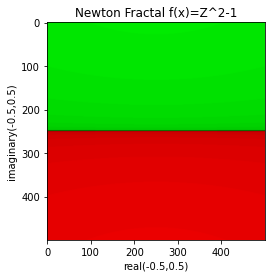

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


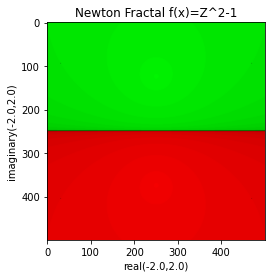

Z region from ( -4.0 , -4.0 ) to ( 4.0 , 4.0 )


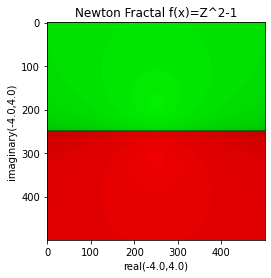

zoom in
Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


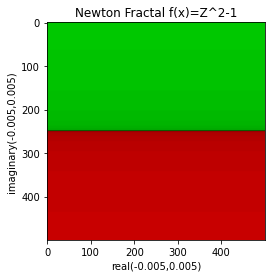

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


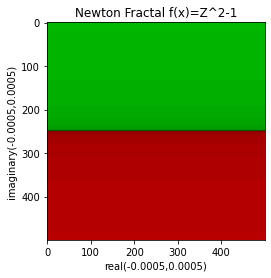

Z region from ( -5e-06 , -5e-06 ) to ( 5e-06 , 5e-06 )


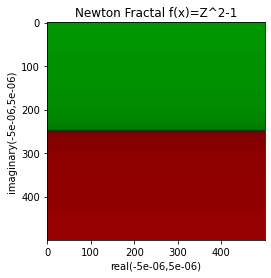

La representación muestra que el polinomio tiene dos raíces, pero dada la orientación se puede ver que son complejas. Estas se alcanzan dependiendo del punto inicial tomado.


In [41]:
def f(z):
    return z ** 2 +1

def df(z):
    return 2 * z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = complex(0,-1)
    r2 =  complex(0,1)

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

print("zoom out")
display1(zoom=1)
display1(zoom=4)
display1(zoom=8) 

print("zoom in")
display1(zoom=1/100)
display1(zoom=1/1000)
display1(zoom=1/100000)

print("La representación muestra que el polinomio tiene dos raíces, pero dada la orientación se puede ver que son complejas. Estas se alcanzan dependiendo del punto inicial tomado.")

## Parte 4

z^2

Positive axes


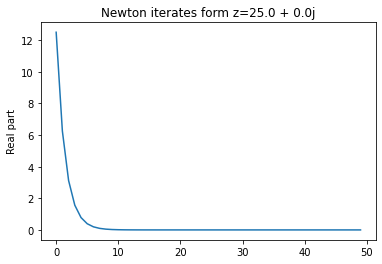

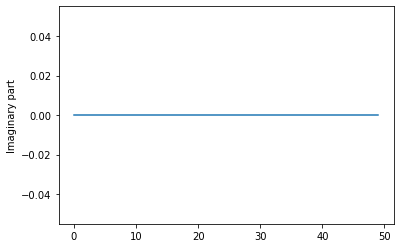

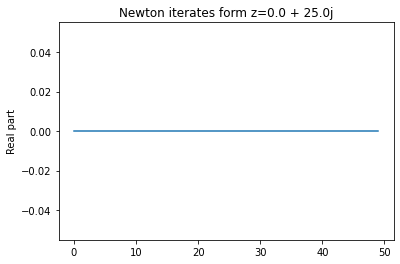

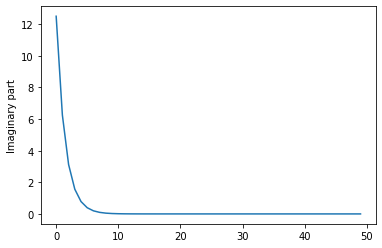

Negative axes


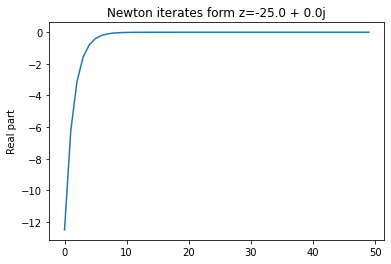

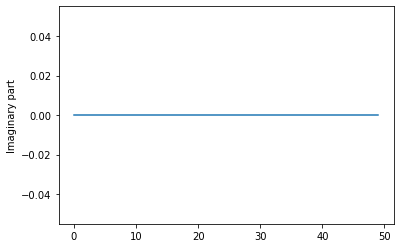

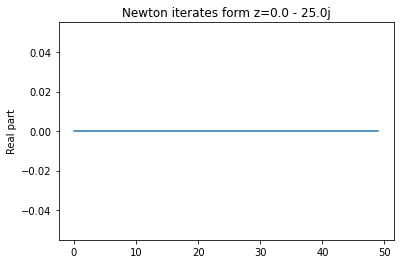

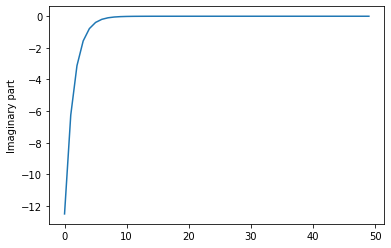

In [42]:
def f_i(z):
  return z**2
def df_i(z):
  return 2*z
z=25.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df_i(z)
  z = z - f_i(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
print("Positive axes")
plt.title('Newton iterates form z=25.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=0.0 + 25.0j
r=[]
i=[]
for k in range(50):
  dz = df_i(z)
  z = z - f_i(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 25.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

print("Negative axes")
z=-25.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df_i(z)
  z = z - f_i(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-25.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()
z=0.0 - 25.0j
r=[]
i=[]
for k in range(50):
  dz = df_i(z)
  z = z - f_i(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 25.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

(z-1)^2

Positive axes


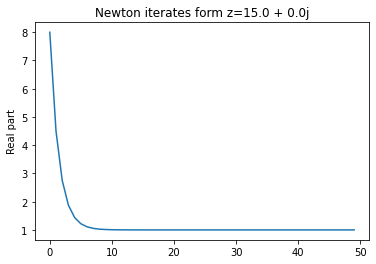

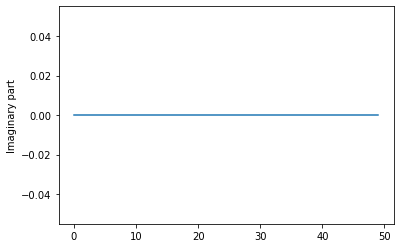

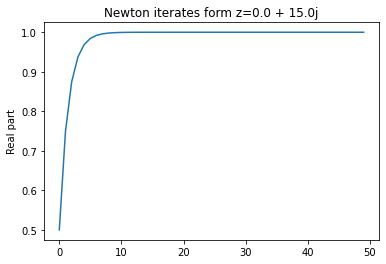

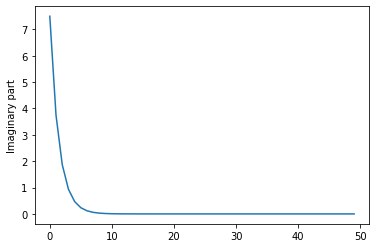

Negative axes


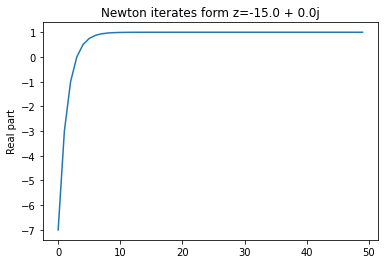

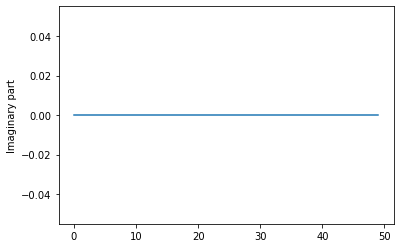

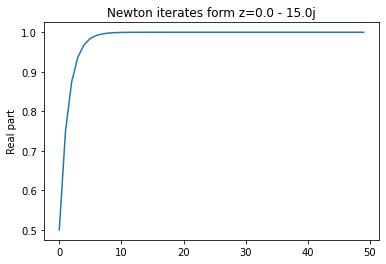

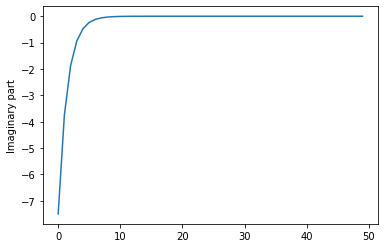

In [43]:
def f_ii(z):
  return (z-1)**2
def df_ii(z):
  return 2*(z-1)
z=15.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df_ii(z)
  z = z - f_ii(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
print("Positive axes")
plt.title('Newton iterates form z=15.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=0.0 + 15.0j
r=[]
i=[]
for k in range(50):
  dz = df_ii(z)
  z = z - f_ii(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 15.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

print("Negative axes")
z=-15.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df_ii(z)
  z = z - f_ii(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-15.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()
z=0.0 - 15.0j
r=[]
i=[]
for k in range(50):
  dz = df_ii(z)
  z = z - f_ii(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 15.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z^2-1

Positive axes


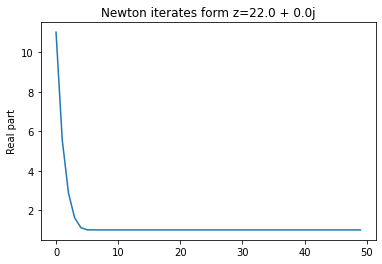

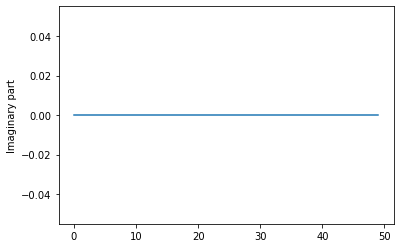

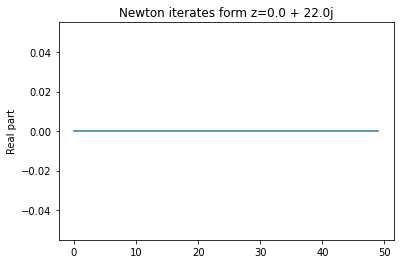

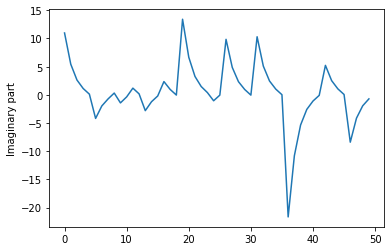

Negative axes


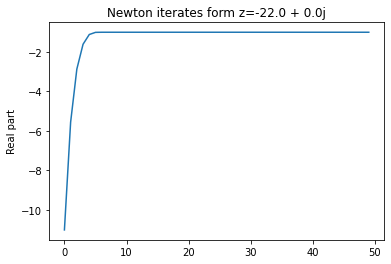

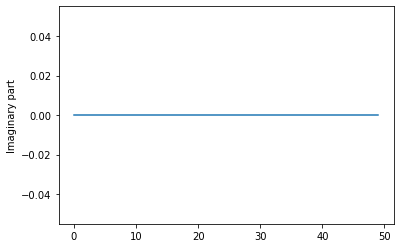

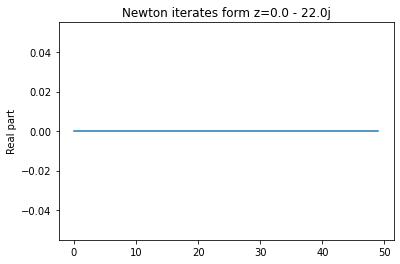

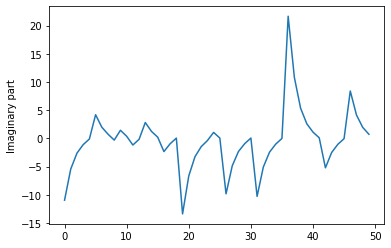

In [44]:
def f_iii(z):
  return (z**2)-1
def df_iii(z):
  return 2*z
z=22.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df_iii(z)
  z = z - f_iii(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
print("Positive axes")
plt.title('Newton iterates form z=22.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=0.0 + 22.0j
r=[]
i=[]
for k in range(50):
  dz = df_iii(z)
  z = z - f_iii(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 22.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

print("Negative axes")
z=-22.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df_iii(z)
  z = z - f_iii(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-22.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()
z=0.0 - 22.0j
r=[]
i=[]
for k in range(50):
  dz = df_iii(z)
  z = z - f_iii(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 22.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z^2+1

Positive axes


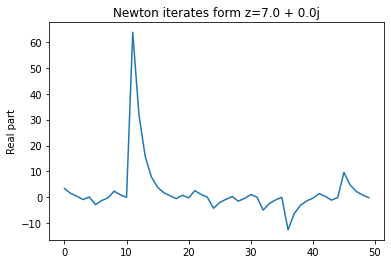

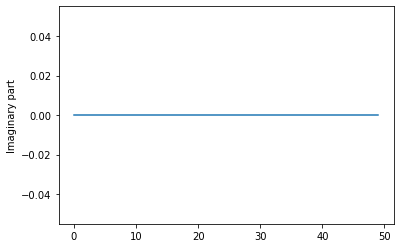

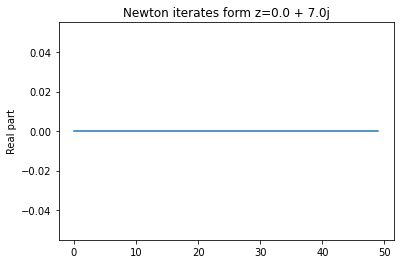

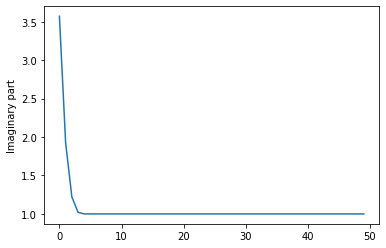

Negative axes


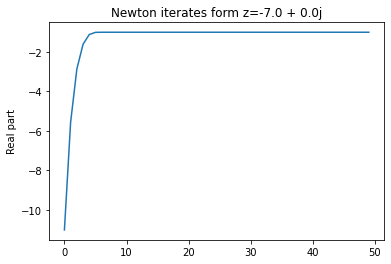

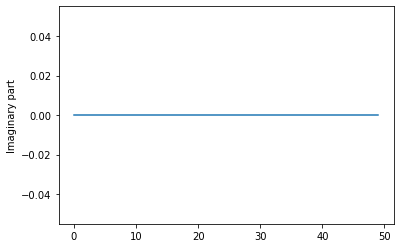

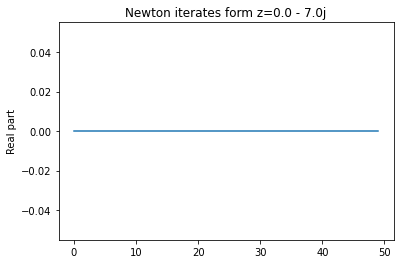

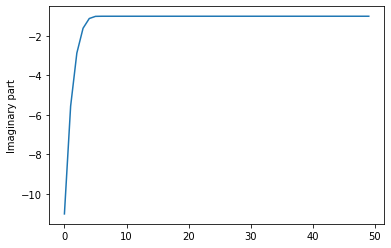

In [45]:
def f_iv(z):
  return (z**2)+1
def df_iv(z):
  return 2*z
z=7.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df_iv(z)
  z = z - f_iv(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
print("Positive axes")
plt.title('Newton iterates form z=7.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z=0.0 + 7.0j
r=[]
i=[]
for k in range(50):
  dz = df_iv(z)
  z = z - f_iv(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 7.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

print("Negative axes")
z=-22.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df_iv(z)
  z = z - f_iii(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-7.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()
z=0.0 - 22.0j
r=[]
i=[]
for k in range(50):
  dz = df_iv(z)
  z = z - f_iv(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 7.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## 5to

z^2

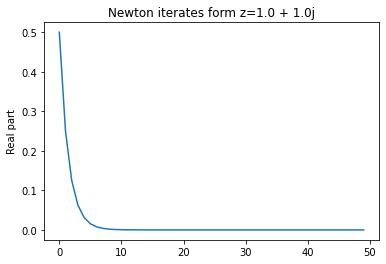

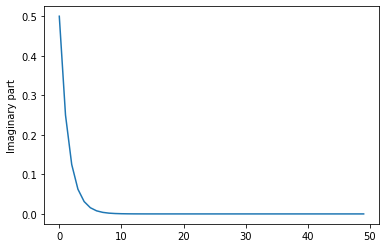

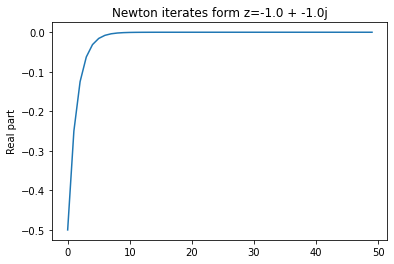

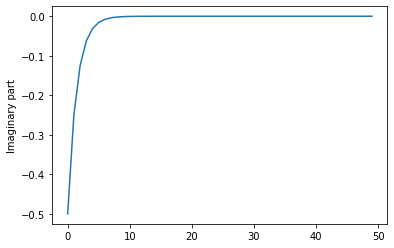

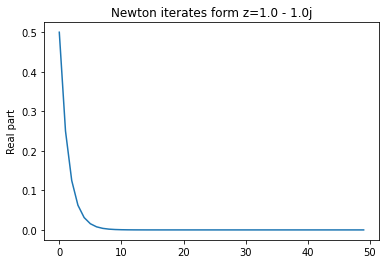

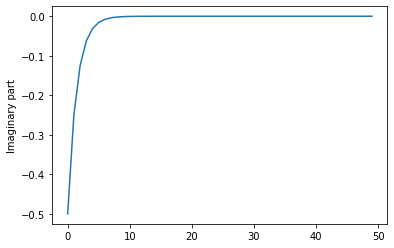

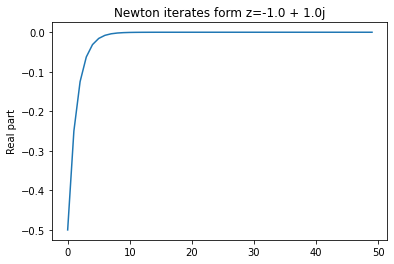

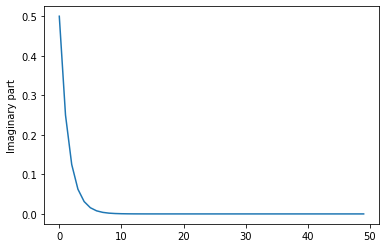

TypeError: ignored

In [47]:
def f_i(z):
  return z**2
def df_i(z):
  return 2*z
z=1.0 + 1.0j
r=[]
i=[]
for k in range(50):
  dz = df_i(z)
  z = z - f_i(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=1.0 + 1.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()
z=-1.0 + -1.0j
r=[]
i=[]
for k in range(50):
  dz = df_i(z)
  z = z - f_i(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-1.0 + -1.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()
z=1.0 - 1.0j
r=[]
i=[]
for k in range(50):
  dz = df_i(z)
  z = z - f_i(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=1.0 - 1.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()
z=-1.0 + 1.0j
r=[]
i=[]
for k in range(50):
  dz = df_i(z)
  z = z - f_i(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-1.0 + 1.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()
z=0.0+ 0.0j
r=[]
i=[]
for k in range(50):
  dz = df_i(z)
  z = z - f_i(z) // dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

(z-1)^2

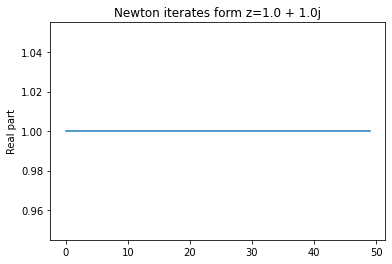

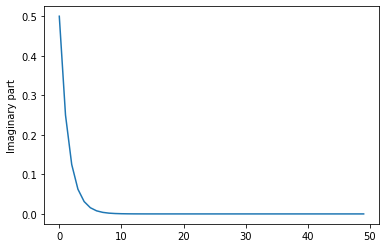

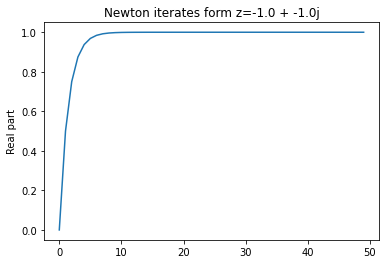

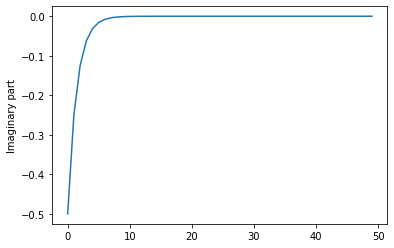

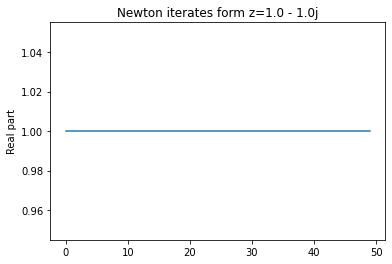

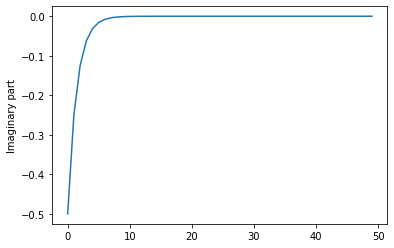

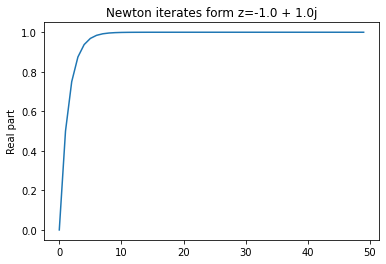

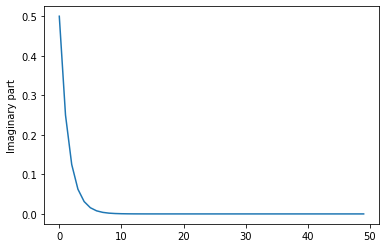

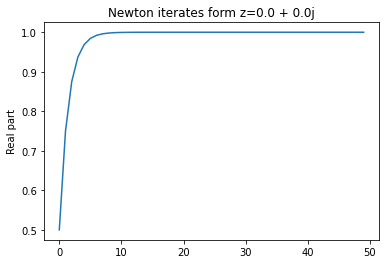

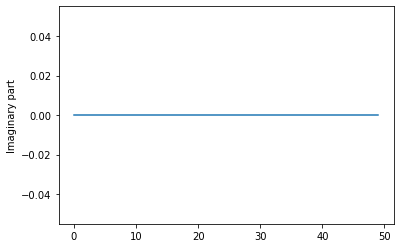

In [48]:
def f_ii(z):
  return (z-1)**2
def df_ii(z):
  return 2*(z-1)
z=1.0 + 1.0j
r=[]
i=[]
for k in range(50):
  dz = df_ii(z)
  z = z - f_ii(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=1.0 + 1.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()
z=-1.0 + -1.0j
r=[]
i=[]
for k in range(50):
  dz = df_ii(z)
  z = z - f_ii(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-1.0 + -1.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()
z=1.0 - 1.0j
r=[]
i=[]
for k in range(50):
  dz = df_ii(z)
  z = z - f_ii(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=1.0 - 1.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()
z=-1.0 + 1.0j
r=[]
i=[]
for k in range(50):
  dz = df_ii(z)
  z = z - f_ii(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-1.0 + 1.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()
z=0.0+ 0.0j
r=[]
i=[]
for k in range(50):
  dz = df_ii(z)
  z = z - f_ii(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z^2 – 1

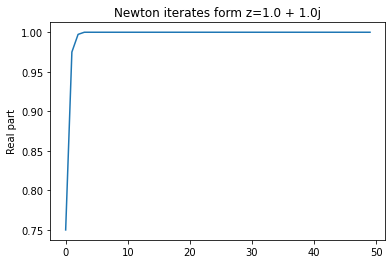

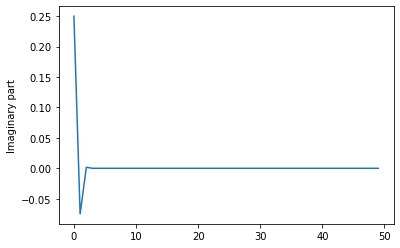

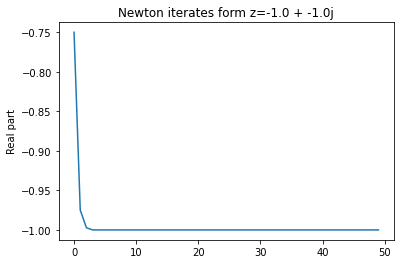

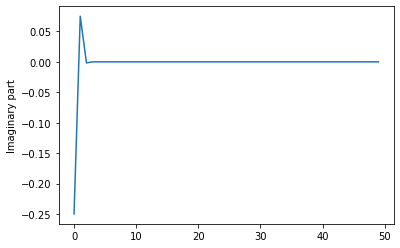

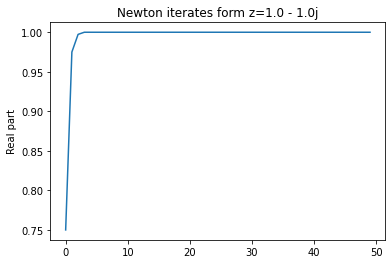

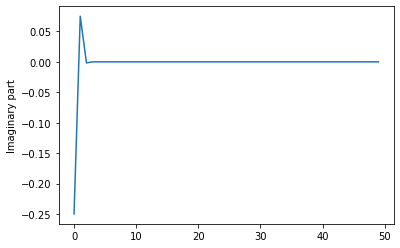

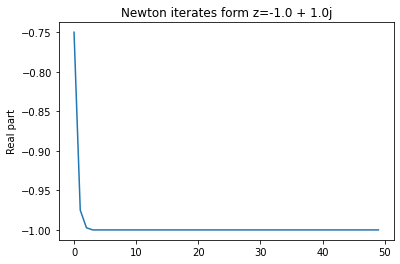

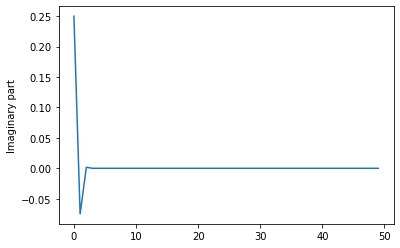

ZeroDivisionError: ignored

In [49]:
def f_iii(z):
  return (z**2)-1
def df_iii(z):
  return 2*z
z=1.0 + 1.0j
r=[]
i=[]
for k in range(50):
  dz = df_iii(z)
  z = z - f_iii(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=1.0 + 1.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()
z=-1.0 + -1.0j
r=[]
i=[]
for k in range(50):
  dz = df_iii(z)
  z = z - f_iii(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-1.0 + -1.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()
z=1.0 - 1.0j
r=[]
i=[]
for k in range(50):
  dz = df_iii(z)
  z = z - f_iii(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=1.0 - 1.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()
z=-1.0 + 1.0j
r=[]
i=[]
for k in range(50):
  dz = df_iii(z)
  z = z - f_iii(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-1.0 + 1.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()
z=0.0+ 0.0j
r=[]
i=[]
for k in range(50):
  dz = df_iii(z)
  z = z - f_iii(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

z^2+ 1

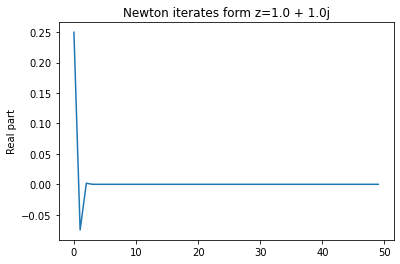

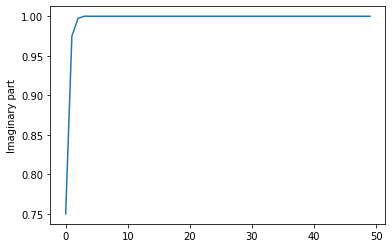

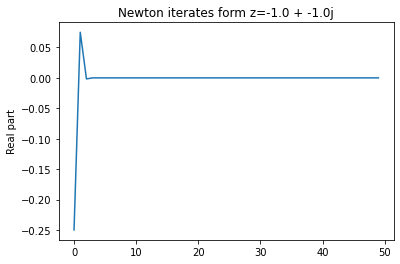

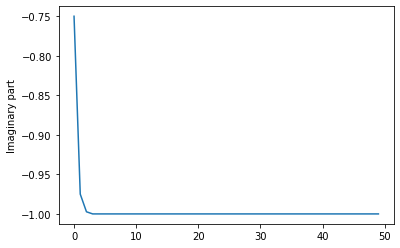

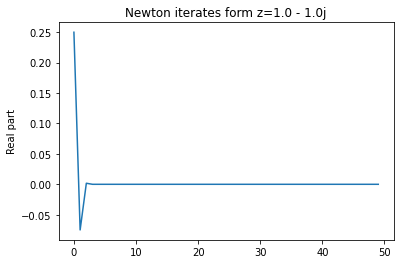

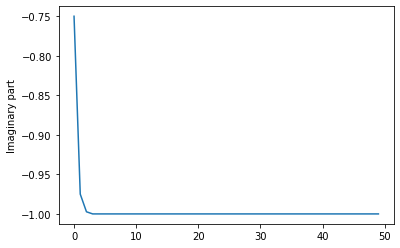

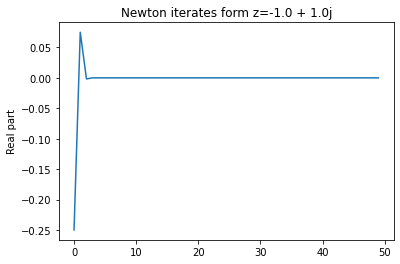

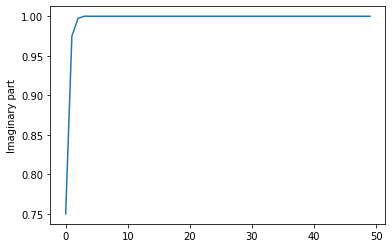

ZeroDivisionError: ignored

In [50]:
def f_iv(z):
  return (z**2)+1
def df_iv(z):
  return 2*z
z=1.0 + 1.0j
r=[]
i=[]
for k in range(50):
  dz = df_iv(z)
  z = z - f_iv(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=1.0 + 1.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()
z=-1.0 + -1.0j
r=[]
i=[]
for k in range(50):
  dz = df_iv(z)
  z = z - f_iv(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-1.0 + -1.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()
z=1.0 - 1.0j
r=[]
i=[]
for k in range(50):
  dz = df_iv(z)
  z = z - f_iv(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=1.0 - 1.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()
z=-1.0 + 1.0j
r=[]
i=[]
for k in range(50):
  dz = df_iv(z)
  z = z - f_iv(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-1.0 + 1.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()
z=0.0+ 0.0j
r=[]
i=[]
for k in range(50):
  dz = df_iv(z)
  z = z - f_iv(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()